## Motivation

Model overfitting during training is associated with very large estimated parmeters ($w_i >> 0$).

Overfitting is not limited to polynomial regression of large degree.  It can also happen if you use a large number of features!  

Why? Overfitting depends on how much data you have and if there is enough to get a representative sample for the complexity of the model.

How do the number of features affect overfitting?
* __feature__ : Data must include representative example of all (𝑥, 𝑦) pairs to avoid overfitting (HARD)
* __D features__ : Data must include representative example of all 𝑥_1 , 𝑥_2 , … , 𝑥_𝐷 , 𝑦 combos to avoid overfitting! (MUCH HARDER)

Having many features introduces "Curse of Dimensionality".

We could use cross validation / validation set to pick which model complexity to use
* In the case of polynomial regression, we just chose degree 𝑝
* For deciding which or how many features to use, there are a lot of choices!
  **  For 𝑑 inputs, there are 2^d subsets of those features!
  
What if we use a model that wasn’t prone to overfitting?
* __Big Idea__: Have the model self-regulate to prevent overfitting by making sure its coefficients don’t get ”too large”

This idea is called **regularization**.

The "Cost function" that we have been using is the Ordinary Least Squares (OLS):

$$\hat{w}_{LS} = \min_w RSS(w)$$

We can arbitrarily minimize this OLS by increasing the complexity of the model.  This leads to reduction in the "bias" of the model but increases the variance of the model -- so that it is less generalizable.  

$$\hat{w}_{ridge} = \min_w RSS(w) + \lambda R(w)$$

R(w) is some cost function of the complexity of the model parameters.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
font = {'size': 18}
matplotlib.rc('font', **font)

%matplotlib inline

In [2]:
# Define the true function f
def f(x):
    return 100 * (x - 0.5) ** 3 - 16 * x **2 + 2 * x + 6.25

In [3]:
# Generate a list of x's so we can properly draw the model
xs = np.linspace(0, 1, 1000).reshape((1000, 1))

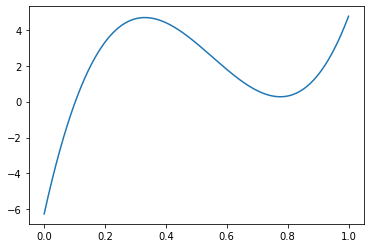

In [4]:
plt.plot(xs, f(xs))

In [5]:
# Generate 20 random data points
X = np.random.uniform(0 , 1, 20).reshape((20, 1))
X

array([[0.29943666],
       [0.57676053],
       [0.54486316],
       [0.61577668],
       [0.30782623],
       [0.02988054],
       [0.06912128],
       [0.4104333 ],
       [0.49489124],
       [0.28614017],
       [0.27936326],
       [0.94142738],
       [0.08320361],
       [0.94910138],
       [0.98595054],
       [0.85202018],
       [0.91832816],
       [0.6453727 ],
       [0.70305355],
       [0.8692064 ]])

In [6]:
# Generate 20 noisy targets for training data
y = f(X) + np.random.normal(0, 1, (20, 1))

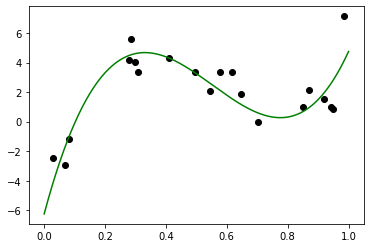

In [7]:
# Plot them together
plt.plot(xs, f(xs), color='green')
plt.scatter(X, y, color='black')

## Overfitting

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def poly_model(degree, X, y, xs):
    # Generate polynomial features of degree p
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    xs_poly = poly.transform(xs)

    # Train the model and make predictions along all xs
    model = LinearRegression()
    model.fit(X_poly, y)
    predictions = model.predict(xs_poly)

    # Plot the prediction results
    plt.scatter(X, y, label='Data', c='black')
    plt.plot(xs, predictions, label='Predicted f')

    # Customize plot for readability
    plt.title(f'Degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")  # Legend outside plot
    plt.xlim(0, 1)
    plt.ylim(-10, 5* y.max() + 1)

    plt.show()

Let's understand how the degree polynomial fit can cause overfitting for a fixed sized dataset

In [9]:
# Code to create the interactive widget
from ipywidgets import fixed, interactive, IntSlider, widget, widgets

interactive_plot = interactive(poly_model, 
                               degree=IntSlider(min=0, max=30),
                               X=fixed(X),
                               y=fixed(y),
                               xs=fixed(xs))

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=0, description='degree', max=30), Output(layout=Layout(height='350px')))…

Let's see how the magnitude of the coefficients changes as we increase the degree of the polynomial. Notice that the y-scale is long so the biggest values are on the order of  1014 !

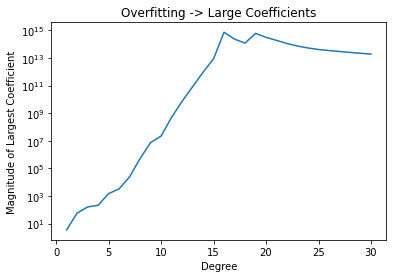

In [13]:
degrees = list(range(1, 31))
largest_coeffs = []

for p in degrees:  
    # Generate data with polynomial features of degree p
    poly = PolynomialFeatures(p)
    X_poly = poly.fit_transform(X)
    xs_poly = poly.transform(xs)

    # Train the model 
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Find largest coefficient
    coeff = np.abs(model.coef_).max()
    largest_coeffs.append(coeff)
    
# Plot the coefficients
plt.plot(degrees, largest_coeffs)
plt.title('Overfitting -> Large Coefficients')
plt.xlabel('Degree')
plt.ylabel('Magnitude of Largest Coefficient')
plt.yscale('log')

How can we think about overfitting?  One way to to consider the number of datapoints matter for overfitting. If we use a high degree polynomial and a small dataset, its more likely to overfit. If we use the same degree polynomial but on a larger dataset, it is harder to overfit

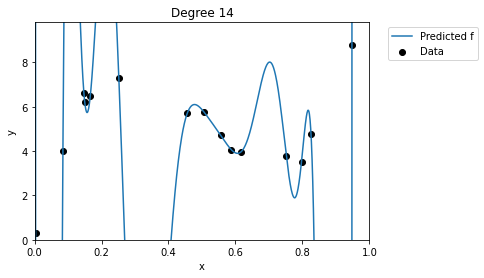

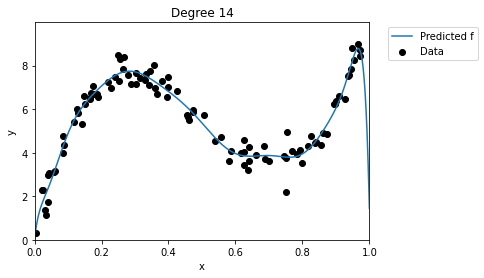

In [33]:
# Generate 100 random data points
X_100 = np.random.uniform(0 , 1, 100).reshape((100, 1))
y_100 = f(X_100) + np.random.normal(0, 0.5, (100, 1))

# Train a 14 degree polynomial on 15 points
poly_model(14, X_100[:15], y_100[:15], xs)
# Train a 14 degree polynomial on 100 points
poly_model(14, X_100, y_100, xs)

## Ridge Regression

Let's apply a penalty :  𝜆  * a cost function on the complexity of the model

Ordinary Least Squares
$$\hat{w}_{LS} = \min_w RSS(w)$$

Ridge Regression

$$\hat{w}_{ridge} = \min_w RSS(w) + \lambda ||w||_2^2$$


In [34]:
# Simple code to train a Ridge model
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.5)

In [35]:
# Define the function for plotting
def poly_model_ridge(lam, degree, X, y, xs, ):
    # Generate polynomial features of degree p
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    xs_poly = poly.transform(xs)

    # Train the model and make predictions along all xs
    model = Ridge(alpha=lam)
    model.fit(X_poly, y)
    predictions = model.predict(xs_poly)

    # Plot the prediction results
    plt.scatter(X, y, label='Data', c='black')
    plt.plot(xs, predictions, label='Predicted f')

    # Customize plot for readability
    plt.title(f'Lambda {lam:0.2e}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")  # Legend outside plot
    plt.xlim(0, 1)
    plt.ylim(0, y.max() + 1)

    plt.show()

In [36]:
# Define interaction code
from ipywidgets import fixed, interactive, FloatLogSlider, widget, widgets

interactive_plot = interactive(poly_model_ridge, 
                               lam=FloatLogSlider(min=-10, max=3, value=-3),
                               degree=fixed(14),
                               X=fixed(X),
                               y=fixed(y),
                               xs=fixed(xs))

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatLogSlider(value=1e-10, description='lam', max=3.0, min=-10.0), Output(layout=Layout…

## LASSO Regression

Ordinary Least Squares
$$\hat{w}_{LS} = \min_w RSS(w)$$

LASSO Regression

$$\hat{w}_{lasso} = \min_w RSS(w) + \lambda ||w||_1$$


In [37]:
# Simple code to train a Lasso model
from sklearn.linear_model import Lasso
model = Lasso(alpha=1.5)

In [38]:
from sklearn.preprocessing import PolynomialFeatures

# Define the function for plotting
def poly_model_lasso(lam, degree, X, y, xs, ):
    # Generate polynomial features of degree p
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    xs_poly = poly.transform(xs)

    # Train the model and make predictions along all xs
    model = Lasso(alpha=lam)
    model.fit(X_poly, y)
    predictions = model.predict(xs_poly)

    # Plot the prediction results
    plt.scatter(X, y, label='Data', c='black')
    plt.plot(xs, predictions, label='Predicted f')

    # Customize plot for readability
    plt.title(f'Lambda {lam:0.2e}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")  # Legend outside plot
    plt.xlim(0, 1)
    plt.ylim(0, y.max() + 1)

    plt.show()

In [39]:
# Define interaction code
from ipywidgets import fixed, interactive, IntSlider, FloatLogSlider, widget, widgets

interactive_plot = interactive(poly_model_lasso, 
                               lam=FloatLogSlider(min=-3, max=3, value=-3),
                               degree=IntSlider(min=0, max=20, value=1),
                               X=fixed(X),
                               y=fixed(y),
                               xs=fixed(xs))

output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatLogSlider(value=0.001, description='lam', max=3.0, min=-3.0), IntSlider(value=1, de…